<h1 style="text-align: center">Bike Sharing Assignment</h1>
<br/>
<div style="text-align: center">
        By:<br/>
        Peter Sharun Woodman M
</div>

### Problem Statement:
- #### To accelerate revenue of BoomBikes as soon as the ongoing lockdown due to the ongoing Corona pandemic comes to an end
- #### For this, as a consulting company, we need to provide the following details:<br/>
     - Which variables are significant in predicting the demand of shared bikes
     - How well those variables describe the bike demands

### Steps:
- #### Step 1: Import the required libraries
- #### Step 2: Reading and Understanding the Data
- #### Step 3: Data Cleaning
- #### Step 4: Visualising the Data
- #### Step 5: Data Preparation
- #### Step 6: Splitting the Data into Training and Testing Sets
- #### Step 7: Rescaling the features
- #### Step 8: Building a linear model
- #### Step 9: Residual Analysis of the train data
- #### Step 10: Making Predictions Using the Final Model
- #### Step 11: Model Evaluation
- #### Step 12: Final Words

### Step 1: Import the required libraries

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# For numerical calculations and analysis
import numpy as np
import pandas as pd

# Configuration of DataFrame
pd.set_option('display.max_columns', 500)

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# For calendar related features
import calendar

# For splitting the data into train and test set
from sklearn.model_selection import train_test_split

# For scaling - Min-Max Scaler
from sklearn.preprocessing import MinMaxScaler

# For building linear model
import statsmodels.api as sm

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# For finding MSE and R-squared
from sklearn.metrics import mean_squared_error, r2_score

### Step 2: Reading and Understanding the Data
- #### 2.1: Read the daily bike demand data from excel
- #### 2.2: Inspect the dataframe

-  #### Substep 2.1: Read the daily bike demand data from excel

    Note: Please keep the files to read in the same directory as the current python file

In [2]:
# Importing and reading the daily bike demand database.
daily_bike_demand = pd.read_csv("day.csv")

print("Dataframe after importing and reading from the application_data database :")
display(daily_bike_demand)

Dataframe after importing and reading from the application_data database :


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796


-  #### Substep 2.2: Inspect the dataframe

In [3]:
# Viewing the first 5 records of the dataframe
print("First 5 records of the dataframe:")
display(daily_bike_demand.head(5))

# Viewing the last 5 records of the dataframe
print("Last 5 records of the dataframe:")
display(daily_bike_demand.tail(5))

First 5 records of the dataframe:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Last 5 records of the dataframe:


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
725,726,27-12-2019,1,1,12,0,4,1,2,10.420847,11.33210,65.2917,23.458911,247,1867,2114
726,727,28-12-2019,1,1,12,0,5,1,2,10.386653,12.75230,59.0000,10.416557,644,2451,3095
727,728,29-12-2019,1,1,12,0,6,0,2,10.386653,12.12000,75.2917,8.333661,159,1182,1341
728,729,30-12-2019,1,1,12,0,0,0,1,10.489153,11.58500,48.3333,23.500518,364,1432,1796
729,730,31-12-2019,1,1,12,0,1,1,2,8.849153,11.17435,57.7500,10.374682,439,2290,2729


In [4]:
# Viewing the shape of the dataframe
print("Shape of the dataframe:{0}".format(daily_bike_demand.shape))
print("\t - Number of rows in the dataframe:{0}".format(daily_bike_demand.shape[0]))
print("\t - Number of columns in the dataframe:{0}".format(daily_bike_demand.shape[1]))

print('______________________________________________________________________________\n')

# Columns in DataFrame
print("Columns in DataFrame : \n{0}".format(daily_bike_demand.columns))

print('______________________________________________________________________________\n')

# Viewing the info about the dataframe
print("Info about dataframe:")
print(daily_bike_demand.info())

print('______________________________________________________________________________\n')

# Viewing the general statistical data about the dataframe
print("Describing the dataframe:")
display(daily_bike_demand.describe())

Shape of the dataframe:(730, 16)
	 - Number of rows in the dataframe:730
	 - Number of columns in the dataframe:16
______________________________________________________________________________

Columns in DataFrame : 
Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')
______________________________________________________________________________

Info about dataframe:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64 

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


### Step 3: Data Cleaning
- #### 3.1: Inspect the null values
- #### 3.2: Drop less significant columns
- #### 3.3: Drop duplicate values (if any)
- #### 3.4: Data Conversion and Calculated Variables
- #### 3.5: Outlier detection

-  #### Substep 3.1: Inspect the null values

In [5]:
# Write your code for column-wise null count here
print("Column-wise null count and null percentage:")

# Calculating column-wise null count
demand_col_null_count_series = daily_bike_demand.isnull().sum()

# Calculating column-wise null percentage
demand_col_null_perc_series = round(((demand_col_null_count_series / daily_bike_demand.shape[0]) * 100))

# Combining column-wise null count and null percentages
demand_combined_col_null_df = pd.concat([demand_col_null_count_series, demand_col_null_perc_series], axis=1)

# Changing column names
demand_combined_col_null_df.columns = ['Null Count', 'Null Percentage']

# Printing the combined DataFrame
display(demand_combined_col_null_df)

print("As null percentage of all columns are 0, we are not going to drop columns because of missing data.")

Column-wise null count and null percentage:


,Null Count,Null Percentage
instant,0,0.0
dteday,0,0.0
season,0,0.0
yr,0,0.0
mnth,0,0.0
holiday,0,0.0
weekday,0,0.0
workingday,0,0.0
weathersit,0,0.0
temp,0,0.0


As null percentage of all columns are 0, we are not going to drop columns because of missing data.


-  #### Substep 3.2: Drop less significant columns

In [6]:
# Dropping less significant columns columns
print("Dropping the following columns:")
print("- 'instant' : as it is a record index")
print("- 'dteday' : as it is already captured in the month and year column")
print("- 'atemp' : as it takes into account wind speeds and humidity which are already available seperately.")
print("- 'casual' and 'registered' : As the sum of them is the target variable('cnt'), we are dropping 'casual' and 'registered'")

print('______________________________________________________________________________\n')

print("Dropping 'instant', 'dteday', 'atemp', 'casual' and 'registered'...")
cols_to_drop = ['instant', 'dteday', 'atemp', 'casual', 'registered']
daily_bike_demand.drop(columns=cols_to_drop, inplace=True)

print('______________________________________________________________________________\n')

print("Dataframe after dropping columns:")
display(daily_bike_demand.head(5))

Dropping the following columns:
- 'instant' : as it is a record index
- 'dteday' : as it is already captured in the month and year column
- 'atemp' : as it takes into account wind speeds and humidity which are already available seperately.
- 'casual' and 'registered' : As the sum of them is the target variable('cnt'), we are dropping 'casual' and 'registered'
______________________________________________________________________________

Dropping 'instant', 'dteday', 'atemp', 'casual' and 'registered'...
______________________________________________________________________________

Dataframe after dropping columns:


,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,43.6957,12.522300,1600


-  #### Substep 3.3: Drop duplicate values (if any)

In [7]:
# Calculating number of rows before dropping
print("Number of rows before dropping : {0}\n".format(daily_bike_demand.shape[0]))

# Dropping duplicates
print('Dropping duplicates... \n')
daily_bike_demand.drop_duplicates(keep = 'first', inplace=True)

# Calculating number of rows after dropping
print("Number of rows after dropping : {0}".format(daily_bike_demand.shape[0]))

print('\nWe can observe that there are no duplicate values.')

Number of rows before dropping : 730

Dropping duplicates... 

Number of rows after dropping : 730

We can observe that there are no duplicate values.


-  #### Substep 3.4: Data Conversion and Calculated Variables

In [8]:
# Converting categories from numbers to description

print('Converting the following attributes from numerical to categorical otherwise it might indicate that there is some ordinality:')
print("- 'season'")
print("- 'weathersit'")
print("- 'mnth'")
print("- 'weekday'")

print('______________________________________________________________________________\n')

print('Converting the attributes from numerical to categorical...')

# Converting Season Categories
season_map = {1: "spring_season", 2: "summer_season", 3: "fall_season", 4: "winter_season"}
daily_bike_demand['season'] = daily_bike_demand['season'].map(season_map)

# Converting Weather Categories
weather_map = {1: "clear_weather", 2: "misty_weather", 3: "light_weather", 4: "heavy_weather"}
daily_bike_demand['weathersit'] = daily_bike_demand['weathersit'].map(weather_map)

# Converting Month Categories
def monthIdToDescFunc(inpVal):
    valToRet = calendar.month_name[inpVal] if (str(inpVal).isdecimal() and calendar.month_name[int(inpVal)]) else ""
    return valToRet
daily_bike_demand['mnth'] = daily_bike_demand['mnth'].apply(monthIdToDescFunc)

# Converting Weekday Categories
weekday_map = {0: "Sunday", 1: "Monday", 2: "Tuesday", 3: "Wednesday", 4: "Thursday", 5: "Friday", 6: "Saturday"}
daily_bike_demand['weekday'] = daily_bike_demand['weekday'].map(weekday_map)

print('______________________________________________________________________________\n')

print('Dataframe after convertion:')
display(daily_bike_demand[['season', 'weathersit', 'mnth', 'weekday']].head(5))

Converting the following attributes from numerical to categorical otherwise it might indicate that there is some ordinality:
- 'season'
- 'weathersit'
- 'mnth'
- 'weekday'
______________________________________________________________________________

Converting the attributes from numerical to categorical...
______________________________________________________________________________

Dataframe after convertion:


,season,weathersit,mnth,weekday
0,spring_season,misty_weather,January,Saturday
1,spring_season,misty_weather,January,Sunday
2,spring_season,clear_weather,January,Monday
3,spring_season,clear_weather,January,Tuesday
4,spring_season,clear_weather,January,Wednesday


-  #### Substep 3.5: Outlier detection

In [9]:
# Specifying the columns for outlier detection
cols_to_outliertest = ['temp', 'hum', 'windspeed', 'cnt']

# Describing the columns for outlier detection
print("Describing the columns for outlier detection:")
display(daily_bike_demand[cols_to_outliertest].describe().transpose())

Describing the columns for outlier detection:


,count,mean,std,min,25%,50%,75%,max
temp,730.0,20.319259,7.506729,2.424346,13.811885,20.465826,26.880615,35.328347
hum,730.0,62.765175,14.237589,0.000000,52.000000,62.625000,72.989575,97.250000
windspeed,730.0,12.763620,5.195841,1.500244,9.041650,12.125325,15.625589,34.000021
cnt,730.0,4508.006849,1936.011647,22.000000,3169.750000,4548.500000,5966.000000,8714.000000


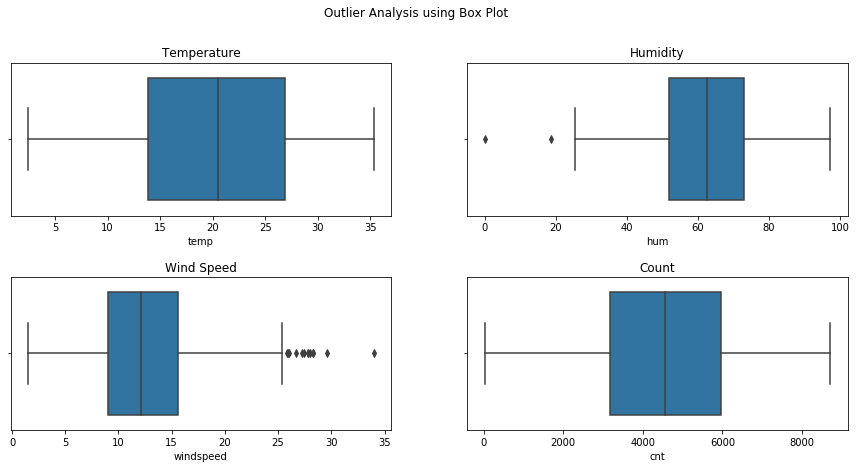

Observations:
- We can observe that there are no outliers for 'temp' and 'cnt' attributes.
- There are two outliers in 'hum' and few outliers in 'windspeed'.


In [10]:
# Using Boxplot to check for outliers
outlier_map = {0: "Temperature", 1: "Humidity", 2: "Wind Speed", 3: "Count"}
plt.figure(figsize=(15, 6))
plt.suptitle('Outlier Analysis using Box Plot')
plt.subplots_adjust(top = 0.85, bottom=0.0, hspace=0.4, wspace=0.2)
for i in range(0, len(cols_to_outliertest)):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=cols_to_outliertest[i], data=daily_bike_demand)
    # Setting Title
    title = outlier_map[i]
    plt.title(title)
    # Setting labels
    plt.xlabel(cols_to_outliertest[i])
plt.show()
    
# Comments
print('Observations:')
print("- We can observe that there are no outliers for 'temp' and 'cnt' attributes.")
print("- There are two outliers in 'hum' and few outliers in 'windspeed'.")

### Step 4: Visualising the Data
- #### 4.1: Visualising Numeric Variables
- #### 4.2: Visualising Categorical Variables

-  #### Substep 4.1: Visualising Numeric Variables

In [11]:
# Describing the numeric columns
num_cols = ['temp', 'hum', 'windspeed', 'cnt']
daily_bike_demand[num_cols].describe()

,temp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000
mean,20.319259,62.765175,12.763620,4508.006849
std,7.506729,14.237589,5.195841,1936.011647
min,2.424346,0.000000,1.500244,22.000000
25%,13.811885,52.000000,9.041650,3169.750000
50%,20.465826,62.625000,12.125325,4548.500000
75%,26.880615,72.989575,15.625589,5966.000000
max,35.328347,97.250000,34.000021,8714.000000


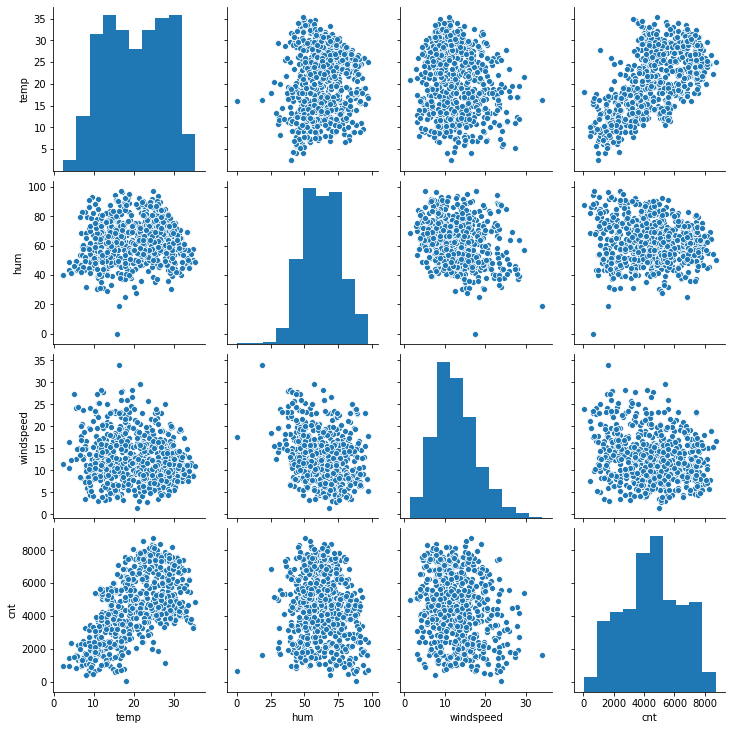

Observations:
- We can see that there is a strong linear relationship between temperature and demand.
- This is one of the assumption which needs to satified for before proceeding with linear regression.


In [12]:
# Visualizing Numerical Variables
sns.pairplot(daily_bike_demand[num_cols])
plt.show()

print("Observations:")
print("- We can see that there is a strong linear relationship between temperature and demand.")
print("- This is one of the assumption which needs to satified for before proceeding with linear regression.")

-  #### Substep 4.2: Visualising Categorical Variables

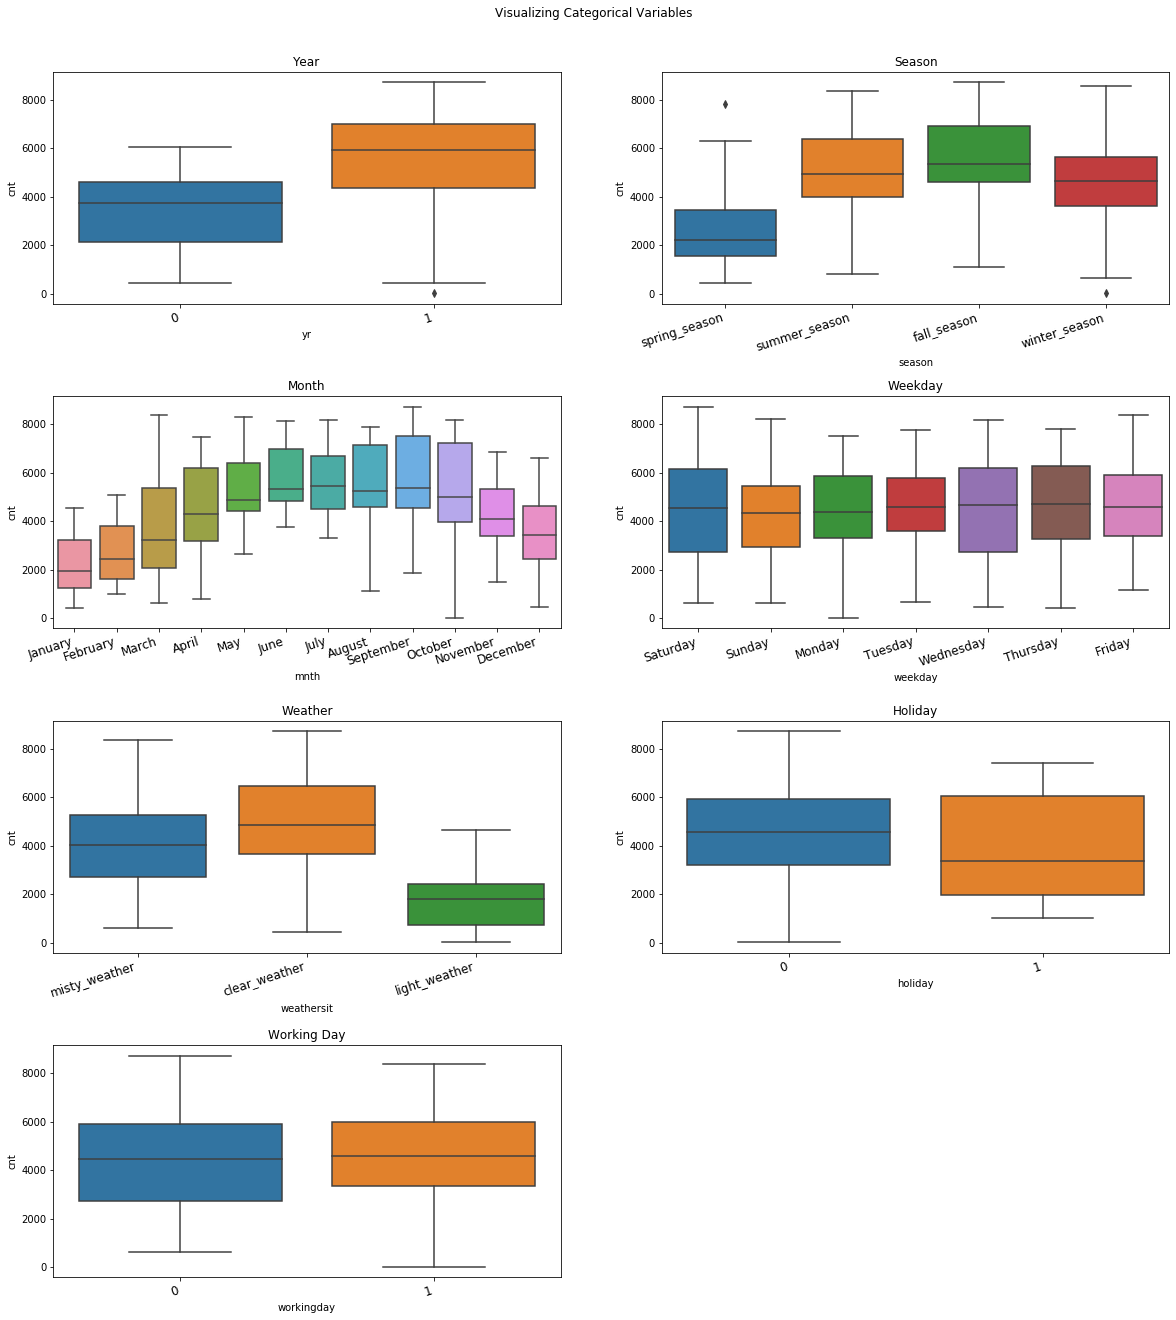

Observations:
1) 'yr' vs 'cnt': 
	- We can see that the count is more for year 2019 when compared to 2018 
	- This tells us that the demand for the bikes are increasing every year.
2) 'season' vs 'cnt': 
	- The mean is maximum for fall and summer season.
	- Spring season has the least mean whereas winter season lies in the middle
3) 'mnth' vs 'cnt': 
	- The demand is maximum for the middle months of the year and is lesser for the starting and ending months
4) 'weekday' vs 'cnt': 
	- We can see that there is no much variation in the mean.
	- There is difference only in the spread of the data, where spread is : 
		- minimum for Tuesday 
		- maximum for Saturday and Wednesday
5) 'weathersit' vs 'cnt': 
	- The demand is maximum when the weather is clear and minimum when weather is light.
	- The mean demand is slightly lesser than maximum when weather is misty.
	- There is no data for heavy weather which clearly indicates there is no demand when weather is very bad.
6) 'holiday' vs 'cnt': 


In [13]:
# Visualizing Categorical Variables
outlier_map = {0: "Year", 1: "Season", 2: "Month", 3: "Weekday", 4: "Weather", 5: "Holiday", 6: 'Working Day'}
cols_to_vis = ['yr', 'season', 'mnth', 'weekday', 'weathersit', 'holiday', 'workingday']
plt.figure(figsize=(20, 18))
plt.suptitle('Visualizing Categorical Variables')
plt.subplots_adjust(top = 0.93, bottom=0.0, hspace=0.4, wspace=0.2)
for i in range(0, len(cols_to_vis)):
    plt.subplot(4,2,i+1)
    sns.boxplot(x = cols_to_vis[i], y = 'cnt', data = daily_bike_demand)
    # Setting title
    title = outlier_map[i]
    plt.title(title)
    # Setting configuration for label
    plt.xticks(
    rotation=18, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='large'  
    )
plt.show()

# Observations
print('Observations:')
print("1) 'yr' vs 'cnt': \n\t- We can see that the count is more for year 2019 when compared to 2018 \n\t- This tells us that the demand for the bikes are increasing every year.")
print("2) 'season' vs 'cnt': \n\t- The mean is maximum for fall and summer season.\n\t- Spring season has the least mean whereas winter season lies in the middle")
print("3) 'mnth' vs 'cnt': \n\t- The demand is maximum for the middle months of the year and is lesser for the starting and ending months")
print("4) 'weekday' vs 'cnt': \n\t- We can see that there is no much variation in the mean.\n\t- There is difference only in the spread of the data, where spread is : \n\t\t- minimum for Tuesday \n\t\t- maximum for Saturday and Wednesday")
print("5) 'weathersit' vs 'cnt': \n\t- The demand is maximum when the weather is clear and minimum when weather is light.\n\t- The mean demand is slightly lesser than maximum when weather is misty.\n\t- There is no data for heavy weather which clearly indicates there is no demand when weather is very bad.")
print("6) 'holiday' vs 'cnt': \n\t- The mean is less when there is a holiday when compared to working day.")
print("7) 'workingday' vs 'cnt': \n\t- The spread is more when it isn't a working day and the mean is almost the same for both cases.")

Visualizing the effect of 'season' and 'workingday' on 'cnt'


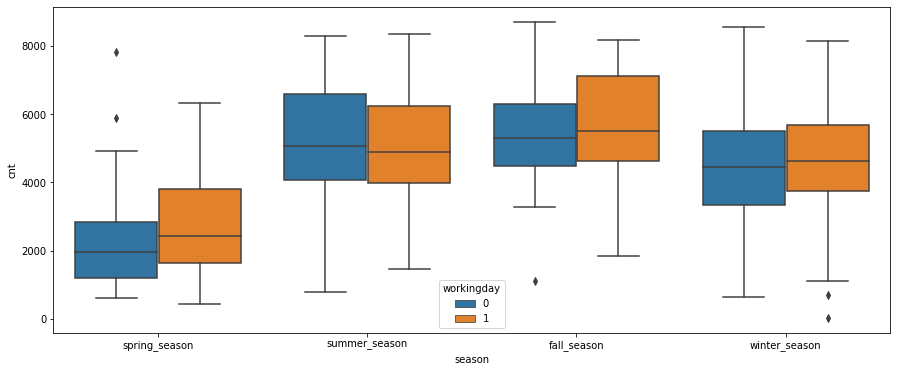

Observations:
- We can see that for a working day the demand is more for spring and fall season.
- However, for winter and summer there is no much difference between their mean demands and not dependent on working day.


In [14]:
# Visualizing the effect of season and workingday on "cnt"
print("Visualizing the effect of 'season' and 'workingday' on 'cnt'")
plt.figure(figsize = (15, 6))
sns.boxplot(x = 'season', y = 'cnt', hue = 'workingday', data = daily_bike_demand)
plt.show()

print("Observations:")
print("- We can see that for a working day the demand is more for spring and fall season.")
print("- However, for winter and summer there is no much difference between their mean demands and not dependent on working day.")

As there are atleast few independent variables that are linearly related, we can proceed with linear regression.

### Step 5: Data Preparation

In [15]:
print("Converting the 'season', 'weathersit', 'mnth' and 'weekday' from categorical variable into dummy/indicator variables...")

# Let's drop the first column from status df using 'drop_first = True'
season_dummy = pd.get_dummies(daily_bike_demand['season'], drop_first = True)
weathersit_dummy = pd.get_dummies(daily_bike_demand['weathersit'], drop_first = True)
month_dummy = pd.get_dummies(daily_bike_demand['mnth'], drop_first = True)
weekday_dummy = pd.get_dummies(daily_bike_demand['weekday'], drop_first = True)

print('______________________________________________________________________________\n')

# Drop the categorical variables for which dummy variables are created
print("Dropping the categorical variables for which dummy variables are created...")
daily_bike_demand.drop(columns=['season', 'weathersit', 'mnth', 'weekday'], inplace=True, errors='ignore')

print('______________________________________________________________________________\n')

# Add the dummy variables to the daily demand dataframe
print("Adding the dummy variables to the daily demand dataframe...")
daily_bike_demand = pd.concat([daily_bike_demand, season_dummy, weathersit_dummy, month_dummy, weekday_dummy], axis = 1)

print('______________________________________________________________________________\n')

# Displaying the resultant dataframe
print("Displaying the resultant dataframe")
daily_bike_demand.head(5)

Converting the 'season', 'weathersit', 'mnth' and 'weekday' from categorical variable into dummy/indicator variables...
______________________________________________________________________________

Dropping the categorical variables for which dummy variables are created...
______________________________________________________________________________

Adding the dummy variables to the daily demand dataframe...
______________________________________________________________________________

Displaying the resultant dataframe


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring_season,summer_season,winter_season,light_weather,misty_weather,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,14.110847,80.5833,10.749882,985,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0
1,0,0,0,14.902598,69.6087,16.652113,801,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0
2,0,0,1,8.050924,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
4,0,0,1,9.305237,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1


### Step 6: Splitting the Data into Training and Testing Sets

In [16]:
# Splitting the data into Training and Testing Sets using train_test_split from sklearn
# Our train-test ratio split is 70:30.
# We are setting the random seed so that the train and test set always have the same rows.
print("Splitting the data into Training and Testing Sets in the ratio of 70:30...")
df_train, df_test = train_test_split(daily_bike_demand, train_size = 0.7, test_size = 0.3, random_state = 100)

print('______________________________________________________________________________\n')

# Examining the number of rows in the splitted sets
print("Viewing the number of rows in the splitted sets.")
print("-Number of rows in the training set: {0}".format(df_train.shape[0]))
print("-Number of rows in the test set: {0}".format(df_test.shape[0]))

Splitting the data into Training and Testing Sets in the ratio of 70:30...
______________________________________________________________________________

Viewing the number of rows in the splitted sets.
-Number of rows in the training set: 510
-Number of rows in the test set: 219


### Step 7: Rescaling the features
- #### 7.1: Rescaling using Min-Max Scaling
- #### 7.2: Visualizing Correlation

-  #### Substep 7.1: Rescaling using Min-Max Scaling

In [17]:
# We will use Min-Max Scaling technique to rescale the required features
scaler = MinMaxScaler()

# Displaying the dataframe to check which features need scaling
print("Displaying the dataframe to check which features need scaling:")
display(df_train.head(5))

print('______________________________________________________________________________\n')

# Analyzing the dataframe
print("Analyzing the dataframe, we can see that the following columns need scaling:")
print("- 'temp'")
print("- 'hum'")
print("- 'windspeed'")
print("- 'cnt'")
cols_to_scale = ['temp', 'hum', 'windspeed', 'cnt']

print('______________________________________________________________________________\n')

# Apply min-max scaler to the required columns
print("Applying min-max scaler to the required columns...")
df_train[cols_to_scale] = scaler.fit_transform(df_train[cols_to_scale])

print('______________________________________________________________________________\n')

print("Displaying the dataframe after scaling:")
display(df_train.head(5))

Displaying the dataframe to check which features need scaling:


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring_season,summer_season,winter_season,light_weather,misty_weather,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,19.201653,55.8333,12.208807,7534,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
576,1,0,1,29.246653,70.4167,11.083475,7216,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,16.980847,62.1250,10.792293,4066,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
728,1,0,0,10.489153,48.3333,23.500518,1796,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,15.443347,48.9583,8.708325,4220,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


______________________________________________________________________________

Analyzing the dataframe, we can see that the following columns need scaling:
- 'temp'
- 'hum'
- 'windspeed'
- 'cnt'
______________________________________________________________________________

Applying min-max scaler to the required columns...
______________________________________________________________________________

Displaying the dataframe after scaling:


,yr,holiday,workingday,temp,hum,windspeed,cnt,spring_season,summer_season,winter_season,light_weather,misty_weather,August,December,February,January,July,June,March,May,November,October,September,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
653,1,0,1,0.509887,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
576,1,0,1,0.815169,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
426,1,0,0,0.442393,0.640189,0.255342,0.465255,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
728,1,0,0,0.245101,0.498067,0.663106,0.204096,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
482,1,0,0,0.395666,0.504508,0.188475,0.482973,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


-  #### Substep 7.2: Visualizing Correlation

Visualizing the correlation:


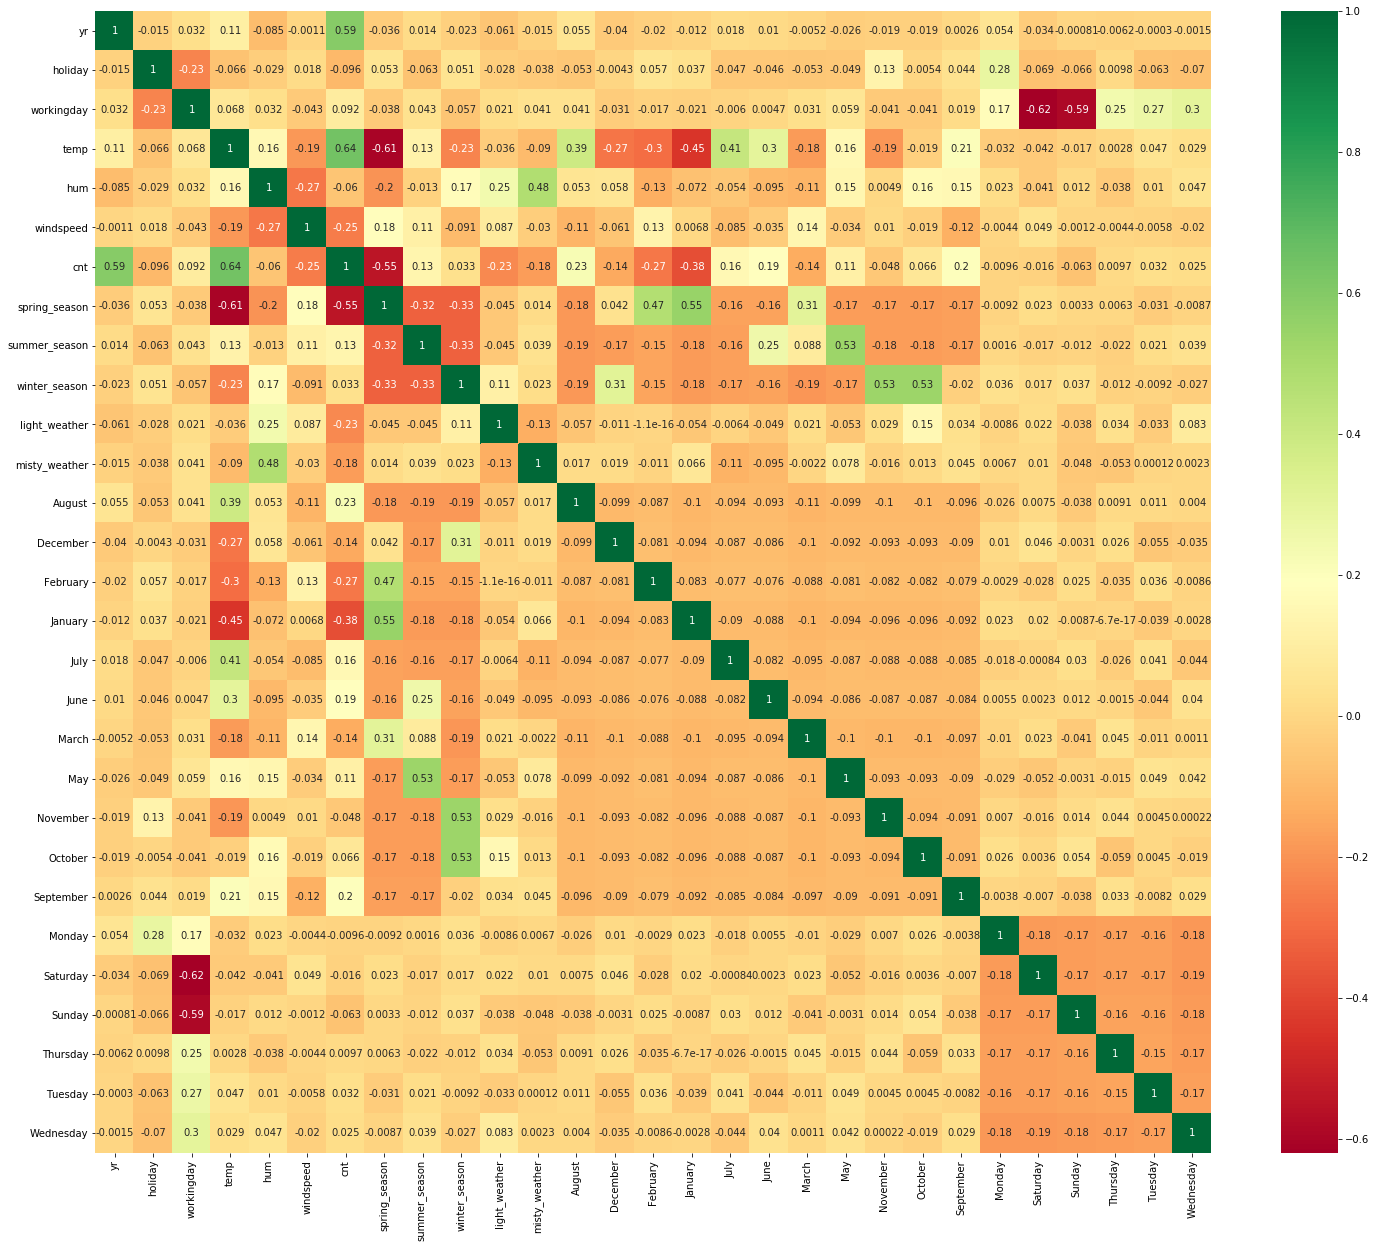

______________________________________________________________________________

Analyzing the heatmap for target variable:
- The target variable 'cnt' has maximum positive correlation with 'temp' and 'yr'
- The target variable 'cnt' has maximum negative correlation with 'spring_season'


In [18]:
# Visualizing the correlation
print("Visualizing the correlation:")
plt.figure(figsize = (25, 21))
sns.heatmap(df_train.corr(), annot=True, cmap="RdYlGn")
plt.show()

print('______________________________________________________________________________\n')

print("Analyzing the heatmap for target variable:")
print("- The target variable 'cnt' has maximum positive correlation with 'temp' and 'yr'")
print("- The target variable 'cnt' has maximum negative correlation with 'spring_season'")

### Step 8: Building a linear model
- #### 8.1: Dividing into X and Y sets for the model building
- #### 8.2: Variable selection using RFE (Recursive Feature Elimination)
- #### 8.3: Building model using statsmodel for detailed statistic
- #### Repeat substep 6.3 until a best model is obtained
- #### 8.4: Visualizing with a scatter plot and fitted regression line

-  #### Substep 8.1: Dividing into X and Y sets for the model building

In [19]:
y_train = df_train.pop('cnt')
X_train = df_train

-  #### Substep 8.2: Variable selection using RFE (Recursive Feature Elimination)

In [20]:
# Using RFE and LinearRegression from sklearn
print("There are {0} columns in the dataframe from which we need to perform variable selection.".format(len(X_train.columns)))
print("Manual approach will be time consuming for such great numbers.")
print("So we will first perform automated selection using RFE for the top 20 features.")

print('______________________________________________________________________________\n')

# Fitting the model using linear regression
print("Fitting the model using linear regression...")
lm = LinearRegression()
lm.fit(X_train, y_train)

print('______________________________________________________________________________\n')

# Performing RFE
print("Running RFE(Recursive Feature Elimination)...")
rfe = RFE(lm, 20)
rfe = rfe.fit(X_train, y_train)

print('______________________________________________________________________________\n')

# Displaying columns selected using RFE
print('Displaying columns selected using RFE:')
cols_selfrom_rfe = X_train.columns[rfe.support_]
print(cols_selfrom_rfe)

There are 28 columns in the dataframe from which we need to perform variable selection.
Manual approach will be time consuming for such great numbers.
So we will first perform automated selection using RFE for the top 20 features.
______________________________________________________________________________

Fitting the model using linear regression...
______________________________________________________________________________

Running RFE(Recursive Feature Elimination)...
______________________________________________________________________________

Displaying columns selected using RFE:
Index(['yr', 'holiday', 'workingday', 'temp', 'hum', 'windspeed',
       'spring_season', 'summer_season', 'winter_season', 'light_weather',
       'misty_weather', 'December', 'February', 'January', 'July', 'May',
       'November', 'September', 'Saturday', 'Sunday'],
      dtype='object')


-  #### Substep 8.3: Building model using statsmodel for detailed statistic

In [21]:
# Defining a common function for calculating model parameters and VIF (Variance Inflation Factor)
def modelDetBasedOnCols(cols_for_model):
    # Adding Constant
    X_train_lm = sm.add_constant(X_train[cols_for_model])
    
    # create a fitted model
    lr = sm.OLS(y_train, X_train_lm).fit()
    
    # Creating a dataframe that will contain the names of all the feature variables and their respective VIFs
    vif = pd.DataFrame()
    vif['Features'] = X_train[cols_for_model].columns
    vif['VIF'] = [variance_inflation_factor(X_train[cols_for_model].values, i) for i in range(X_train[cols_for_model].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    
    # Return Model, VIF and X_train_lm
    return lr, vif, X_train_lm

In [22]:
# Running first model with all shortlisted features from RFE
lr_1, vif_1, X_train_lm = modelDetBasedOnCols(cols_selfrom_rfe)

# Displaying the summary of the first linear model
print("Displaying the summary of the linear model:")
print(lr_1.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the first model:")
display(vif_1)

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the first linear model and VIF")
print("- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.")
print("- The p-value for 'holiday' is very high 0.976 but we can also see that its coefficient is almost 0, so neglecting this for dropping.")
print("- 'May' has the second highest p-value, which means it is insignificant. So let's drop this variable.")

Displaying the summary of the linear model:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                     148.8
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.59e-189
Time:                        12:18:08   Log-Likelihood:                 526.24
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     490   BIC:                            -927.8
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
co

,Features,VIF
2,workingday,60.93
18,Saturday,14.59
19,Sunday,13.91
6,spring_season,5.79
3,temp,4.88
8,winter_season,3.88
7,summer_season,3.49
1,holiday,3.43
13,January,2.38
4,hum,1.97


______________________________________________________________________________

Analysing the first linear model and VIF
- We can see that the R-squared is high and also there is slight difference between R-squared and adj. R-squared.
- The p-value for 'holiday' is very high 0.976 but we can also see that its coefficient is almost 0, so neglecting this for dropping.
- 'May' has the second highest p-value, which means it is insignificant. So let's drop this variable.


In [23]:
# Running second model with all shortlisted features from RFE
cols_for_second_model = cols_selfrom_rfe[cols_selfrom_rfe != 'May']
lr_2, vif_2, X_train_lm = modelDetBasedOnCols(cols_for_second_model)

# Displaying the summary of the linear model
print("Displaying the summary of the second linear model:")
print(lr_2.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the second model:")
display(vif_2)

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the second linear model and VIF:")
print("- We can see that there is no difference in the R-squared and adj. R-squared between the first model and second model.")
print("- As we have neglected 'holiday' for dropping, the column 'February' is insignificant as the p-value is second large (0.112). So let's drop this variable.")

Displaying the summary of the second linear model:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     156.6
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          3.55e-190
Time:                        12:18:08   Log-Likelihood:                 525.15
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     491   BIC:                            -931.8
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

,Features,VIF
2,workingday,58.36
17,Saturday,13.93
18,Sunday,13.35
6,spring_season,5.69
3,temp,4.73
8,winter_season,3.84
1,holiday,3.32
7,summer_season,2.81
13,January,2.37
4,hum,1.94


______________________________________________________________________________

Analysing the second linear model and VIF:
- We can see that there is no difference in the R-squared and adj. R-squared between the first model and second model.
- As we have neglected 'holiday' for dropping, the column 'February' is insignificant as the p-value is second large (0.112). So let's drop this variable.


In [24]:
# Running third model with all shortlisted features from RFE
cols_for_third_model = cols_for_second_model[cols_for_second_model != 'February']
lr_3, vif_3, X_train_lm = modelDetBasedOnCols(cols_for_third_model)

# Displaying the summary of the linear model
print("Displaying the summary of the third linear model:")
print(lr_3.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the third model:")
display(vif_3)

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the third linear model and VIF:")
print("- We can see that there is a small difference in the R-squared between the second model and third model.")
print("- As we have neglected 'holiday' for dropping, the remaining values are significant as p-value is greater than significant value (0.05).")
print("- So let's drop the variable with maximum VIF value - 'workingday'")

Displaying the summary of the third linear model:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.55e-191
Time:                        12:18:08   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

,Features,VIF
2,workingday,56.15
16,Saturday,13.48
17,Sunday,12.86
6,spring_season,5.27
3,temp,4.43
8,winter_season,3.83
1,holiday,3.20
7,summer_season,2.76
4,hum,1.94
14,November,1.76


______________________________________________________________________________

Analysing the third linear model and VIF:
- We can see that there is a small difference in the R-squared between the second model and third model.
- As we have neglected 'holiday' for dropping, the remaining values are significant as p-value is greater than significant value (0.05).
- So let's drop the variable with maximum VIF value - 'workingday'


In [25]:
# Running fourth model with all shortlisted features from RFE
cols_for_fourth_model = cols_for_third_model[cols_for_third_model != 'workingday']
lr_4, vif_4, X_train_lm = modelDetBasedOnCols(cols_for_fourth_model)

# Displaying the summary of the linear model
print("Displaying the summary of the fourth linear model:")
print(lr_4.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the fourth model:")
display(vif_4)

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the fourth linear model and VIF:")
print("- We can see that there is no difference in the R-squared and adj. R-squared between the fourth model and third model.")
print("- The p-value for 'holiday' has reduced and coefficient is increased making it significant.")
print("- However, The column 'Saturday' is insignificant as the p-value is large (0.344). So let's drop this variable.")

Displaying the summary of the fourth linear model:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     165.2
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          9.55e-191
Time:                        12:18:08   Log-Likelihood:                 523.84
No. Observations:                 510   AIC:                            -1012.
Df Residuals:                     492   BIC:                            -935.5
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

,Features,VIF
3,hum,31.22
2,temp,17.86
4,windspeed,4.75
5,spring_season,4.39
7,winter_season,4.08
6,summer_season,2.81
9,misty_weather,2.34
0,yr,2.09
13,November,1.83
11,January,1.75


______________________________________________________________________________

Analysing the fourth linear model and VIF:
- We can see that there is no difference in the R-squared and adj. R-squared between the fourth model and third model.
- The p-value for 'holiday' has reduced and coefficient is increased making it significant.
- However, The column 'Saturday' is insignificant as the p-value is large (0.344). So let's drop this variable.


In [26]:
# Running fifth model with all shortlisted features from RFE
cols_for_fifth_model = cols_for_fourth_model[cols_for_fourth_model != 'Saturday']
lr_5, vif_5, X_train_lm = modelDetBasedOnCols(cols_for_fifth_model)

# Displaying the summary of the linear model
print("Displaying the summary of the fifth linear model:")
print(lr_5.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the fifth model:")
display(vif_5)

print('______________________________________________________________________________\n')

# Analysing the linear model and VIF
print("Analysing the fifth linear model and VIF:")
print("- We can see that there is no difference in the R-squared and adj. R-squared between the fifth model and fourth model.")
print("- All the p-values are greater than significance levels.")
print("- The column 'hum' has high VIF value. So let's drop this variable.")

Displaying the summary of the fifth linear model:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     175.5
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.11e-191
Time:                        12:18:08   Log-Likelihood:                 523.38
No. Observations:                 510   AIC:                            -1013.
Df Residuals:                     493   BIC:                            -940.8
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

,Features,VIF
3,hum,31.22
2,temp,17.81
4,windspeed,4.72
5,spring_season,4.37
7,winter_season,4.07
6,summer_season,2.81
9,misty_weather,2.34
0,yr,2.09
13,November,1.83
11,January,1.75


______________________________________________________________________________

Analysing the fifth linear model and VIF:
- We can see that there is no difference in the R-squared and adj. R-squared between the fifth model and fourth model.
- All the p-values are greater than significance levels.
- The column 'hum' has high VIF value. So let's drop this variable.


In [27]:
# Running sixth model with all shortlisted features from RFE
cols_for_sixth_model = cols_for_fifth_model[cols_for_fifth_model != 'hum']
lr_6, vif_6, X_train_lm = modelDetBasedOnCols(cols_for_sixth_model)

# Displaying the summary of the sixth linear model
print("Displaying the summary of the sixth linear model:")
print(lr_6.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the sixth model
print("Displaying the VIF of the sixth model:")
display(vif_6)

print('______________________________________________________________________________\n')

# Analysing the sixth linear model and VIF
print("Analysing the sixth linear model and VIF:")
print("- We can see that there is a difference in the R-squared and adj. R-squared between the sixth model and fifth model.")
print("- The VIF is still greater than 5, so lets drop another column.")
print("- Here the column 'summer_season' has the maximum p-value and a VIF value 2.24. So let's drop this variable.")

Displaying the summary of the sixth linear model:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     180.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.98e-189
Time:                        12:18:08   Log-Likelihood:                 515.27
No. Observations:                 510   AIC:                            -998.5
Df Residuals:                     494   BIC:                            -930.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------

,Features,VIF
2,temp,5.21
3,windspeed,4.67
6,winter_season,2.97
4,spring_season,2.92
5,summer_season,2.24
0,yr,2.07
12,November,1.80
10,January,1.66
11,July,1.60
8,misty_weather,1.56


______________________________________________________________________________

Analysing the sixth linear model and VIF:
- We can see that there is a difference in the R-squared and adj. R-squared between the sixth model and fifth model.
- The VIF is still greater than 5, so lets drop another column.
- Here the column 'summer_season' has the maximum p-value and a VIF value 2.24. So let's drop this variable.


In [28]:
# Running seventh model
cols_for_seventh_model = cols_for_sixth_model[cols_for_sixth_model != 'summer_season']
lr_7, vif_7, X_train_lm = modelDetBasedOnCols(cols_for_seventh_model)

# Displaying the summary of the linear model
print("Displaying the summary of the seventh linear model:")
print(lr_7.summary())

print('______________________________________________________________________________\n')

# Displaying the VIF of the model
print("Displaying the VIF of the seventh model:")
display(vif_7)

print('______________________________________________________________________________\n')

# Analysing the seventh linear model and VIF
print("Analysing the seventh linear model and VIF:")
print("- We can see that there is a small difference in the R-squared and adj. R-squared between the seventh model and sixth model.")
print("- All the p-values are lesser than the significant level (0.05) and VIF values are lesser than 5.")
print("- As the p-values and VIF's are in the acceptable range, we will use this model for our predictions.")

Displaying the summary of the seventh linear model:
                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     191.7
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          1.64e-189
Time:                        12:18:08   Log-Likelihood:                 512.71
No. Observations:                 510   AIC:                            -995.4
Df Residuals:                     495   BIC:                            -931.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

,Features,VIF
2,temp,4.73
3,windspeed,4.05
5,winter_season,2.56
4,spring_season,2.38
0,yr,2.06
11,November,1.80
9,January,1.65
7,misty_weather,1.53
8,December,1.46
10,July,1.36


______________________________________________________________________________

Analysing the seventh linear model and VIF:
- We can see that there is a small difference in the R-squared and adj. R-squared between the seventh model and sixth model.
- All the p-values are lesser than the significant level (0.05) and VIF values are lesser than 5.
- As the p-values and VIF's are in the acceptable range, we will use this model for our predictions.


### Step 9: Residual Analysis of the train data

In [29]:
# Predicting values using the model obtained for training dat
y_train_pred = lr_7.predict(X_train_lm)

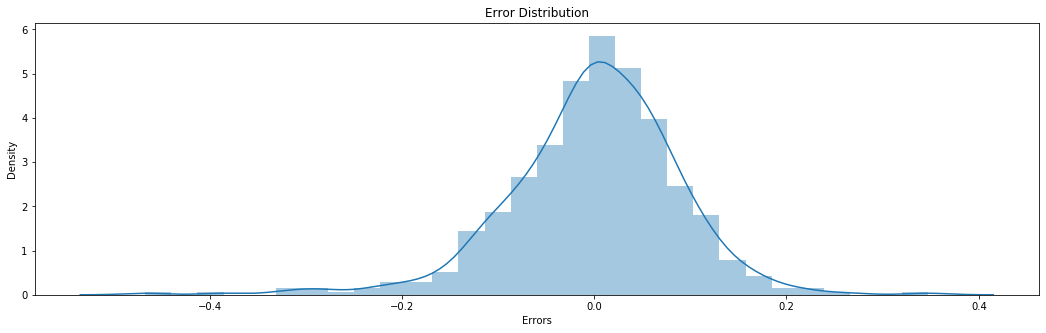

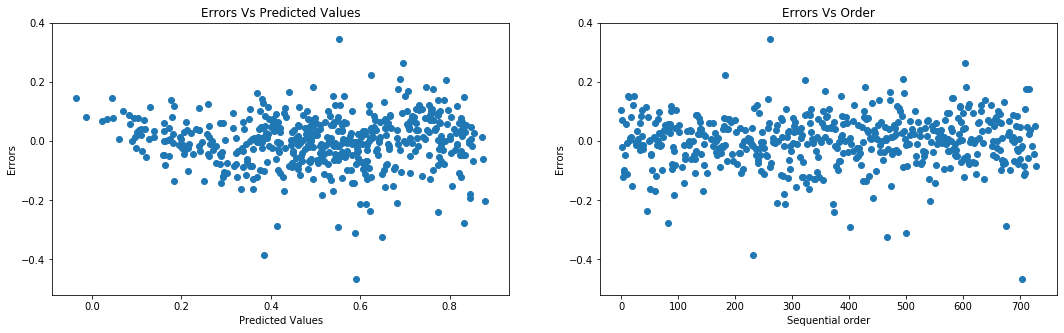

______________________________________________________________________________

Validating assumptions:
- From error distribution: 
	- We can see that the error terms are normally distributed.
	- The error terms are almost cantered around the zero mean
- From Errors Vs Predicted Value graph: 
	- We can see that there is no decreasing or increasing pattern in error terms, thus the error terms have a constant variance i.e. homoscedastic
- From Errors Vs Order graph: 
	- The error terms are randomly scattered, there is no visible pattern. Therefore, the error terms are independent
______________________________________________________________________________

General Analysis:
- The R-squared of the model for training data set is 0.8443 which means our model is a good fit for the training data.
- The Mean Squared Error (MSE) of the model for training data set is 0.0078.


In [30]:
# Plotting the error terms

# Finding error difference between actual y and predicted y
error_term = (y_train - y_train_pred)

plt.figure(figsize=(18, 5))
plt.subplot(1, 1, 1)
# Distribution plot for the error terms
sns.distplot(error_term, bins = 30)
# Setting the labels
plt.title("Error Distribution")
plt.ylabel('Density')
plt.xlabel('Errors')

plt.figure(figsize=(18,5))
plt.subplot(1,2,1)
# Scatter plot for the error terms and predicted values
plt.scatter(x=y_train_pred, y=error_term)
# Setting the labels
plt.title("Errors Vs Predicted Values")
plt.xlabel('Predicted Values')
plt.ylabel('Errors')

plt.subplot(1,2,2)
# Scatter plot for the error terms and its sequential order (time)
plt.scatter(error_term.sort_index(axis = 0).index, error_term)
# Setting the labels
plt.title("Errors Vs Order")
plt.xlabel('Sequential order')
plt.ylabel('Errors')
plt.show()

# Calculating MSE and R-squared using sklearn.metrics
mse_train = round(mean_squared_error(y_train, y_train_pred), 4)
r_squared_train = round(r2_score(y_true=y_train, y_pred=y_train_pred), 4)

print('______________________________________________________________________________\n')

print("Validating assumptions:")
print("- From error distribution: \n\t- We can see that the error terms are normally distributed.\n\t- The error terms are almost cantered around the zero mean")
print("- From Errors Vs Predicted Value graph: \n\t- We can see that there is no decreasing or increasing pattern in error terms, thus the error terms have a constant variance i.e. homoscedastic")
print("- From Errors Vs Order graph: \n\t- The error terms are randomly scattered, there is no visible pattern. Therefore, the error terms are independent")

print('______________________________________________________________________________\n')

print("General Analysis:")
print("- The R-squared of the model for training data set is {0} which means our model is a good fit for the training data.".format(r_squared_train))
print("- The Mean Squared Error (MSE) of the model for training data set is {0}.".format(mse_train))

### Step 10: Making Predictions Using the Final Model
- #### 10.1: Applying the scaling on the test sets
- #### 10.2: Dividing into X_test and y_test
- #### 10.3: Making Predictions

-  #### Substep 10.1: Applying the scaling on the test sets

In [31]:
# Performing scaling for the required columns
df_test[cols_to_scale] = scaler.transform(df_test[cols_to_scale])

-  #### Substep 10.2: Dividing into X_test and y_test

In [32]:
# Dividing into X and Y sets for prediction
df_test_temp = df_test.copy(deep=True)
y_test = df_test_temp.pop('cnt')
X_test = df_test_temp

-  #### Substep 10.3: Making Predictions

In [33]:
# Filtering the training set columns based on the predictor columns
X_test_selcols = X_test[cols_for_seventh_model]

# Adding constant variable to test dataframe
X_test_selcols = sm.add_constant(X_test_selcols)

# Making predictions using the fourth model
y_pred = lr_7.predict(X_test_selcols)

### Step 11: Model Evaluation
- #### 11.1: Plotting actual values vs predicted values on the test data set
- #### 11.2: Examining MSE and R-Squared of test data predictions

-  #### Substep 11.1: Plotting actual values vs predicted values on the test data set

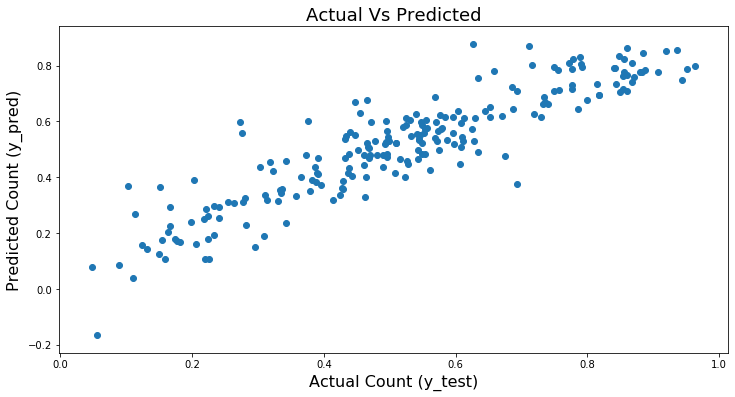

In [34]:
# Plotting y_test and y_pred to understand the spread
plt.figure(figsize=(12,6))
plt.scatter(y_test, y_pred)
# Setting the title
plt.title('Actual Vs Predicted', fontsize = 18)
# Setting the x and y label
plt.xlabel('Actual Count (y_test)', fontsize = 16)
plt.ylabel('Predicted Count (y_pred)', fontsize = 16)
plt.show()

-  #### Substep 11.2: Examining MSE and R-Squared of test data predictions

In [35]:
# Calculating MSE and R-squared using sklearn.metrics
mse = round(mean_squared_error(y_test, y_pred), 4)
r_squared = round(r2_score(y_true=y_test, y_pred=y_pred), 4)

# Viewing MSE and R-squared
print("- R-squared : {0}".format(r_squared))
print("- Mean Squared Error (MSE) : {0}".format(mse))

- R-squared : 0.8185
- Mean Squared Error (MSE) : 0.0086


### Step 12: Final Words

-  #### The following features (mentioned along with their coefficient) are the most important features which defines the bike demand:<br/>
    - Temperature     :  0.3995
    - Year            :  0.2347
    - Holiday         : -0.0990
    - Wind Speed      : -0.1543
    - Spring season   : -0.1026
    - Winter Season   :  0.0679
    - Light Weather   : -0.3006   
    - Misty Weather   : -0.0832   
    - December        : -0.0535   
    - January         : -0.0572   
    - July            : -0.0616   
    - November        : -0.0503   
    - September       :  0.0522
    - Sunday          : -0.0495
-  #### The top 3 features which contribute significantly towards the demand of shared bikes are:
i.	Temperature (“temp”)             : 0.3995 (Positive Correlation)<br/>
ii.	Light Weather (“light_weather”) : -0.3006 (Negative Correlation)<br/>
iii.	Year (“yr”)                                         : 0.2347  (Positive Correlation)

- #### The equation for the best fitting line is:<br/>
    - cnt = 0.2987 + (0.2347 * yr) + (-0.0990 * holiday) + (0.3995 * temp) + (-0.1543 * windspeed) + (-0.1026 * spring_season) + (0.0679 * winter_season) + (-0.3006 * light_weather) + (-0.0832 * misty_weather) + (-0.0535 * December) + (-0.0572 * January) + (-0.0616 * July) + (-0.0503 * November) + (0.0522 * September) + (-0.0495 * Sunday)
- #### The optimized R-squared and mean squared error (MSE) for the training data set are:<br/>
    - R-squared : 0.8443
    - Mean Squared Error (MSE) : 0.0078
- #### Whereas, the optimized R-squared and mean squared error (MSE) for the test data set are:<br/>
    - R-squared : 0.8185
    - Mean Squared Error (MSE): 0.0086
- #### The R-Squared is above 80% and there is only  ~4% difference in the values between R-squared of training set and testing set which means that the linear regression model is performing really well.